In [78]:
# python 2
import os
import pickle as pkl
from numpy import random
import numpy as np
from Bio import SeqIO
from collections import defaultdict
import os
from collections import defaultdict



In [96]:
Amino_alphb = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 'M': 10, 'N': 11,
                   'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}

def sequence_ids(file_):
    '''
    file_: the file to be processed
    IdsL : list of sequence ids
    '''
    IdsL = []
    file__ = open(file_,'r')
    for line in file__:
        if line[0] == '>':
            line = line.replace('>', '')
            line = line.replace('\n','')
            IdsL.append(line)
    file__.close()
    return IdsL


def family_Sizes(IdsL):
    family_dict = defaultdict(list)
    family_sizes = []
    for id in IdsL:
#         print(id)
        label = id.split('_')
#         print(label)
        label = int(label[2])
        if label not in family_dict.keys():
            family_dict[label] = 1
        else:
            family_dict[label] += 1
    for key in sorted(family_dict.keys()):
        family_sizes.append(family_dict[key])
    return(family_sizes)



def freq_vec(kmer_count,k):
    seq_vec = np.zeros(20**k)
    for kmer in sorted(kmer_count.keys()):
        indx = cal_indx(kmer,k)
        if indx <= 20**k:
            seq_vec[indx] = kmer_count[kmer]
    return list(seq_vec)

def slices(seq,w_type = 'overlap',k = 3):
    words = []
    for i in range(0, len(seq) - k + 1):
        words.append(seq[i:i + k])
    return words

def cal_indx(kmer,k):
    """
    :param kmer:
    :return: indx of kmer in the dictionary
    """
    # if amino select C = 20, if DNA selct D = 4
    weight = []
    C = 20
    indx = 0
    for i in range(len(kmer)):
        weight.append(C**i)
    weight.reverse()
    if len(kmer) == k:
        for i in range(len(kmer)):
            if kmer[i] not in Amino_alphb.keys():
                indx = (C**k)+1
                break
            else:
                indx = indx + Amino_alphb[kmer[i]]*weight[i]
        return indx
    else:
        print("kmer size and the kmer mismatch")

def freq(SeqDict,IdsL,k = 3):
    seq_vectors = []
    for key in IdsL:
        seq_record = SeqDict[key]
        seq = str(seq_record.seq)
        
        kmer_list = slices(seq, w_type = 'overlap',k = 3)
        kmer_count = defaultdict(int)  # dict; keys kmer, value --frequency
        for kmer in kmer_list:
            if kmer not in kmer_count:
                kmer_count[kmer] = 1.0
            else:
                kmer_count[kmer] = kmer_count[kmer] + 1.0
        seq_vec = freq_vec(kmer_count,k)
        seq_vectors.append(seq_vec)
    return(seq_vectors)        

In [100]:
path = "C:\Users\Dhananjay\Desktop\Review_PlosOne\Test"
filename = os.path.join(path,"T0.fasta")
SeqDict = SeqIO.to_dict(SeqIO.parse(filename, "fasta"))  # dictonary: keys as fasta ids
IdsL = sequence_ids(file)
seq_vectors = freq(SeqDict,IdsL,k = 3)
seq_vectors = np.asarray(seq_vectors)
print(np.shape(seq_vectors))


(3360L, 8000L)


In [159]:
family_sizes = family_Sizes(IdsL)
class1 = seq_vectors[0:family_sizes[0]]
class2 = seq_vectors[family_sizes[0]:family_sizes[0]+family_sizes[1]]

[0. 0. 0. ... 0. 0. 0.]


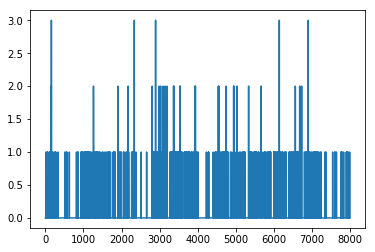

In [186]:
from matplotlib import pyplot as plt 
print(class1[0])
plt.plot(class1[18])
# plt.hist(a, bins = 200)

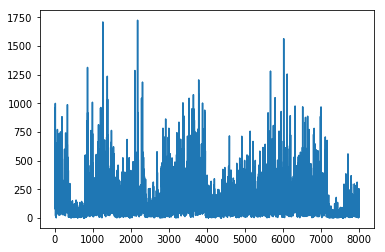

In [148]:
plt.plot(class2)
plt.show()

(array([3., 0., 0., 0., 0., 2., 0., 0., 0., 4.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

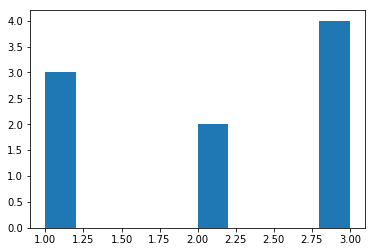

In [140]:
a = np.asarray([1,1,1,2,2,3,3,3,3])
np.histogram(a,bins=5)
plt.hist(a)